<h2>Loading dataset and Importing Libraries</h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Telco_Customer_Churn.csv")

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3166,9097-ZUBYC,Male,0,Yes,No,14,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),48.80,664.4,No
3369,4680-KUTAJ,Female,1,No,No,11,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,55.60,580.8,No
5125,2982-VPSGI,Female,0,Yes,No,11,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.00,1078.9,Yes
1744,8952-WCVCD,Female,0,Yes,No,41,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),104.45,4162.05,No
2549,0188-GWFLE,Male,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,33.7,No


<h2>Data Wrangling</h2>

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
df['TotalCharges'].dtype

dtype('float64')

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [14]:
cols=['OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','OnlineBackup']
df[cols]=df[cols].replace("No internet service","No")

In [15]:
df['SeniorCitizen']=df['SeniorCitizen'].map({1:'Yes',0:'No'})

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.duplicated().sum()

0

<h2>EDA</h2>

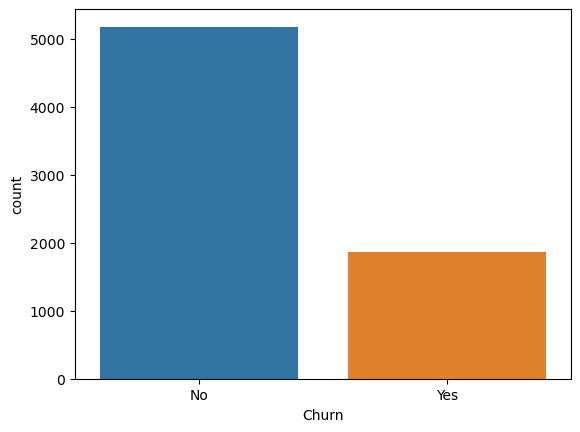

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [18]:
sns.countplot(x='Churn',data=df)
plt.show()
df['Churn'].value_counts(normalize=True)

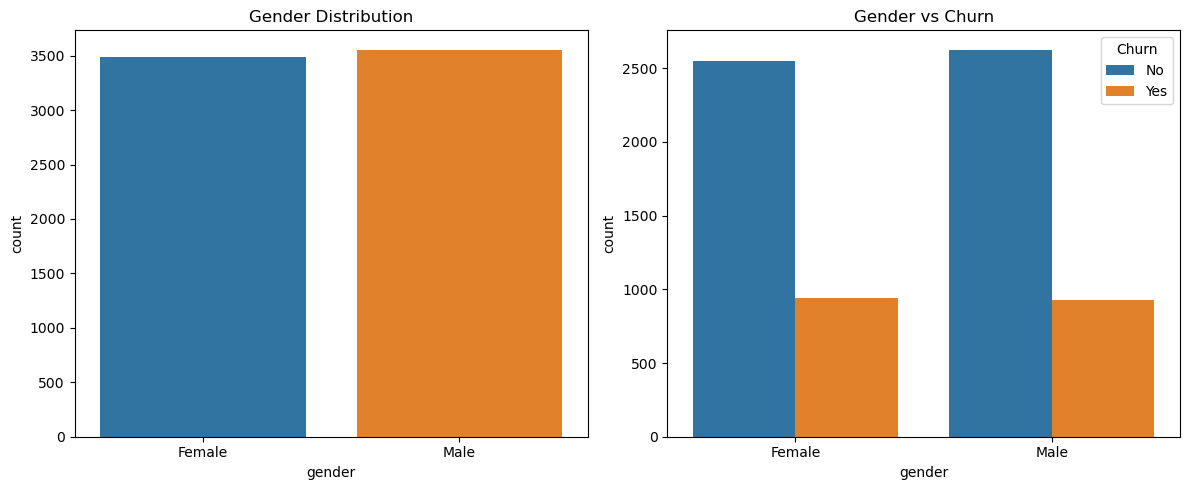

gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

In [19]:
#Relation between Gender and churn
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=df,x='gender')
plt.title('Gender Distribution')

plt.subplot(1,2,2)
sns.countplot(data=df,x='gender',hue='Churn')
plt.title("Gender vs Churn")
plt.tight_layout()
plt.show()
df['gender'].value_counts(normalize=True)

**From the above graph we can understand that the percentage of people leaving is less than the percentage of people retaining.**

<h4>Gender distribution for the men is slightly more than the women

while the churn rate for each gender is also looking to be similar.</h4>

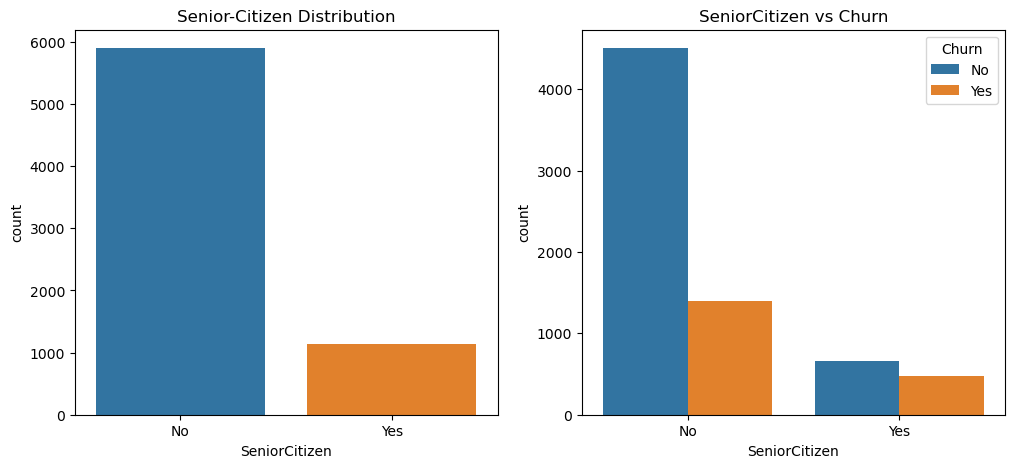

SeniorCitizen
No     0.837853
Yes    0.162147
Name: proportion, dtype: float64

In [20]:
#Relation between Senior Citizen and churn
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=df,x='SeniorCitizen')
plt.title('Senior-Citizen Distribution')

plt.subplot(1,2,2)
sns.countplot(data=df,x='SeniorCitizen',hue='Churn')
plt.title("SeniorCitizen vs Churn")
plt.show()
df['SeniorCitizen'].value_counts(normalize=True)

In [21]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

In [22]:
len(df[(df['SeniorCitizen']=='Yes') & (df['Churn']=='Yes')])/len(df[df['SeniorCitizen']=='Yes'])*100
#Senior citizens Churn Percentge is high

41.68126094570928

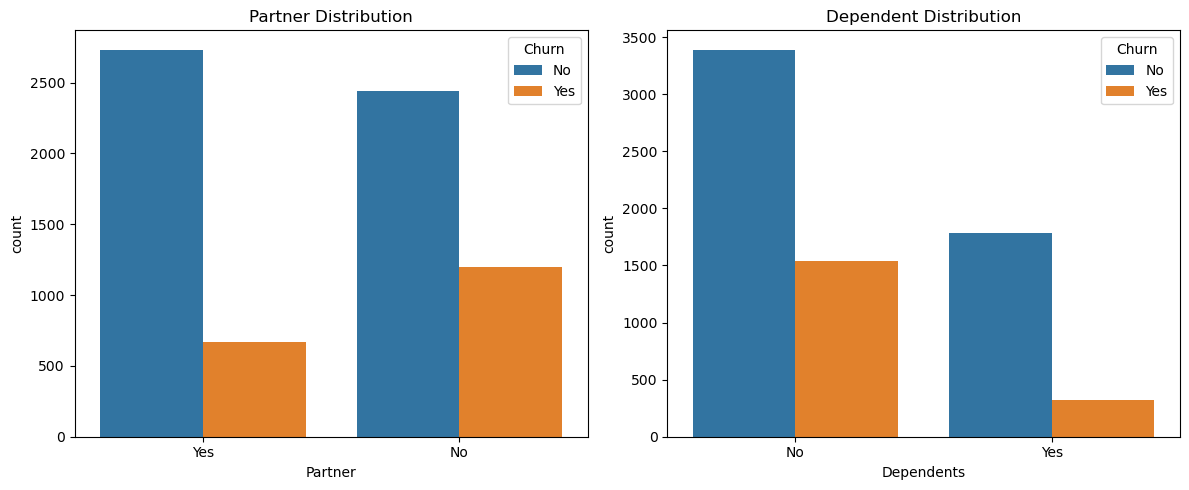

In [23]:
#Relation between partner, dependent and churn
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=df,x="Partner",hue="Churn")
plt.title("Partner Distribution")

plt.subplot(1,2,2)
sns.countplot(data=df,x="Dependents",hue="Churn")
plt.title("Dependent Distribution")
plt.tight_layout()
plt.show()

<h4>Churn rate of people with no partner and independent people is higher.</h4>

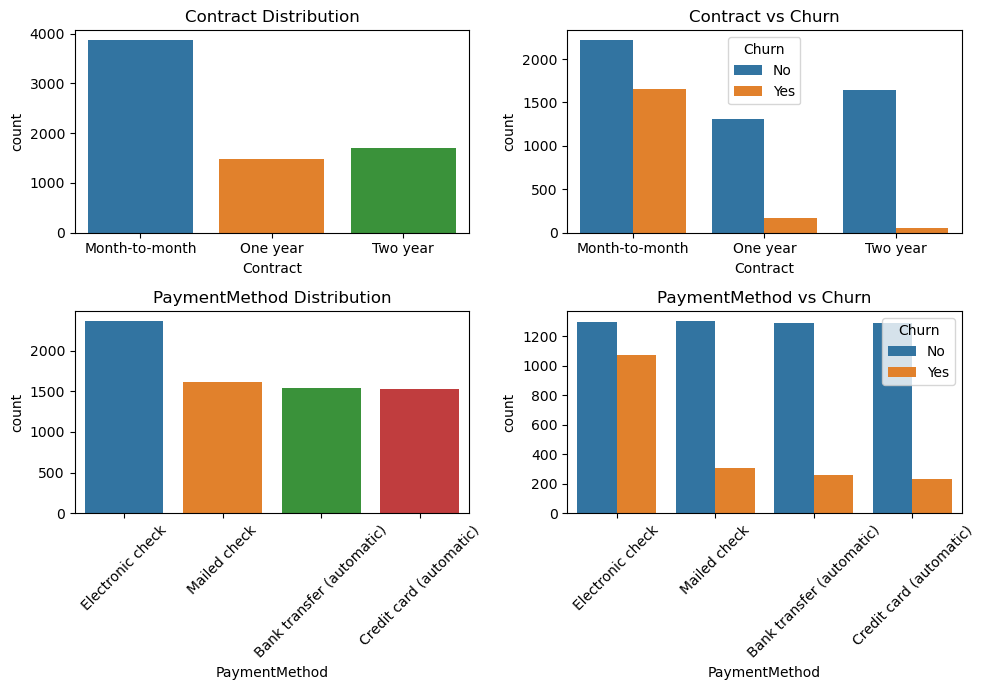

In [24]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
sns.countplot(data=df,x='Contract')
plt.title('Contract Distribution')

plt.subplot(2,2,2)
sns.countplot(data=df,x='Contract',hue='Churn')
plt.title("Contract vs Churn")

plt.subplot(2,2,3)
sns.countplot(data=df,x='PaymentMethod')
plt.title('PaymentMethod Distribution')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.countplot(data=df,x='PaymentMethod',hue='Churn')
plt.title("PaymentMethod vs Churn")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h4>The Churn rate in the month-to-month contract is much higher as compared to the one year and two year contracts.
    
Coming to the Payment Methods, the churn rate in the Electronic check is much higher compared to the other 3 categories. </h4>

In [25]:
df['tenure'].max()

72

In [26]:
#Converting tenure into different buckets
def tenure_range(tenure):
    if tenure <=24:
        return '0 - 24 months'
    elif tenure <=36:
        return '24 - 36 months'
    elif tenure <=48:
        return '36 - 48 months'
    elif tenure <=60:
        return '48 - 60 months'
    else:
        return '> 60 months'
        

In [27]:
df['tenure']=df['tenure'].map(tenure_range)

In [28]:
df['tenure']

0        0 - 24 months
1       24 - 36 months
2        0 - 24 months
3       36 - 48 months
4        0 - 24 months
             ...      
7038     0 - 24 months
7039       > 60 months
7040     0 - 24 months
7041     0 - 24 months
7042       > 60 months
Name: tenure, Length: 7043, dtype: object

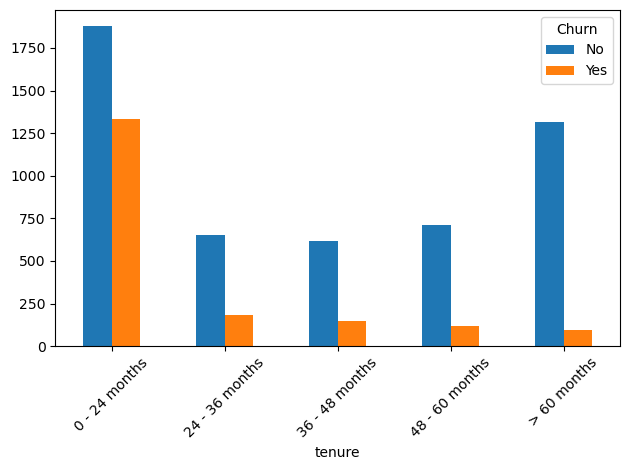

In [29]:
df.groupby(['tenure','Churn']).size().unstack().plot(kind="bar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>The churn rate is high for 0-24 months range and keeps decresing while the tenure increases, the churn rate is least for tenure >60 months. </h4>

In [30]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

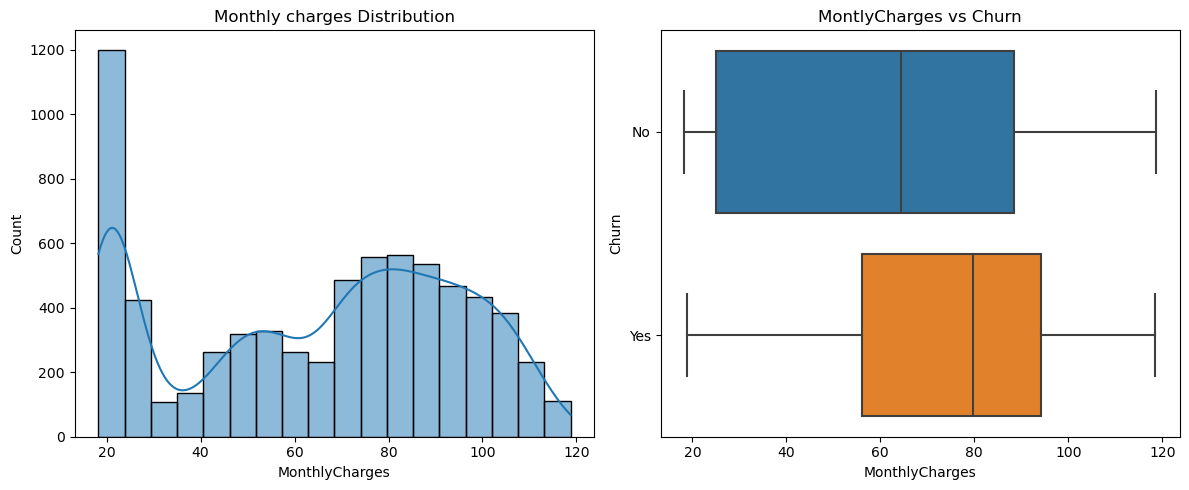

In [31]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data=df,x="MonthlyCharges",kde=True)
plt.title("Monthly charges Distribution")

plt.subplot(1,2,2)
sns.boxplot(data=df,x="MonthlyCharges",y="Churn")
plt.title("MontlyCharges vs Churn")

plt.tight_layout()
plt.show()

<h4>Least montly charge is preferred.
Churn rate among people who pay more monthly charges is more.</h4>

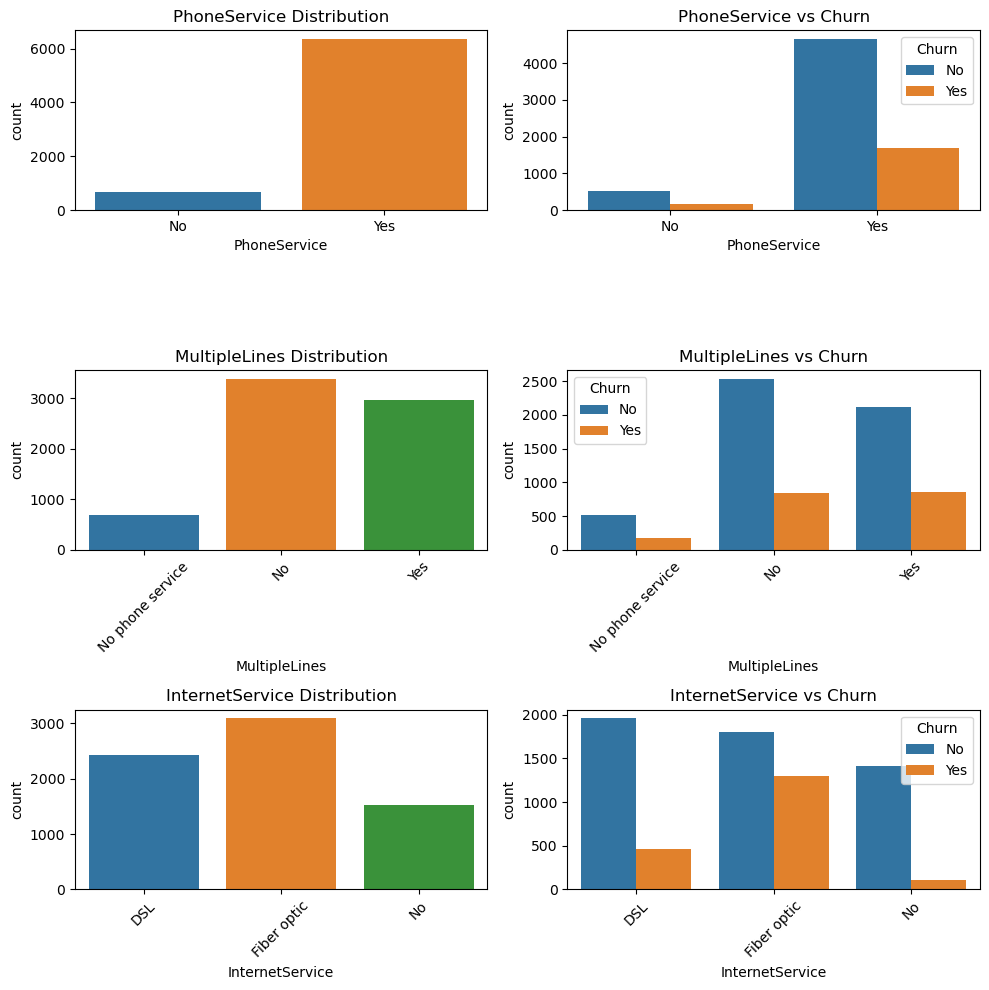

In [32]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.countplot(data=df,x='PhoneService')
plt.title('PhoneService Distribution')

plt.subplot(3,2,2)
sns.countplot(data=df,x='PhoneService',hue='Churn')
plt.title("PhoneService vs Churn")

plt.subplot(3,2,3)
sns.countplot(data=df,x='MultipleLines')
plt.title('MultipleLines Distribution')
plt.xticks(rotation=45)

plt.subplot(3,2,4)
sns.countplot(data=df,x='MultipleLines',hue='Churn')
plt.title("MultipleLines vs Churn")
plt.xticks(rotation=45)

plt.subplot(3,2,5)
sns.countplot(data=df,x='InternetService')
plt.title('InternetService Distribution')
plt.xticks(rotation=45)

plt.subplot(3,2,6)
sns.countplot(data=df,x='InternetService',hue='Churn')
plt.title("InternetService vs Churn")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>Churn rate in people who opted Fibe optic as their internet service is high.</h4>

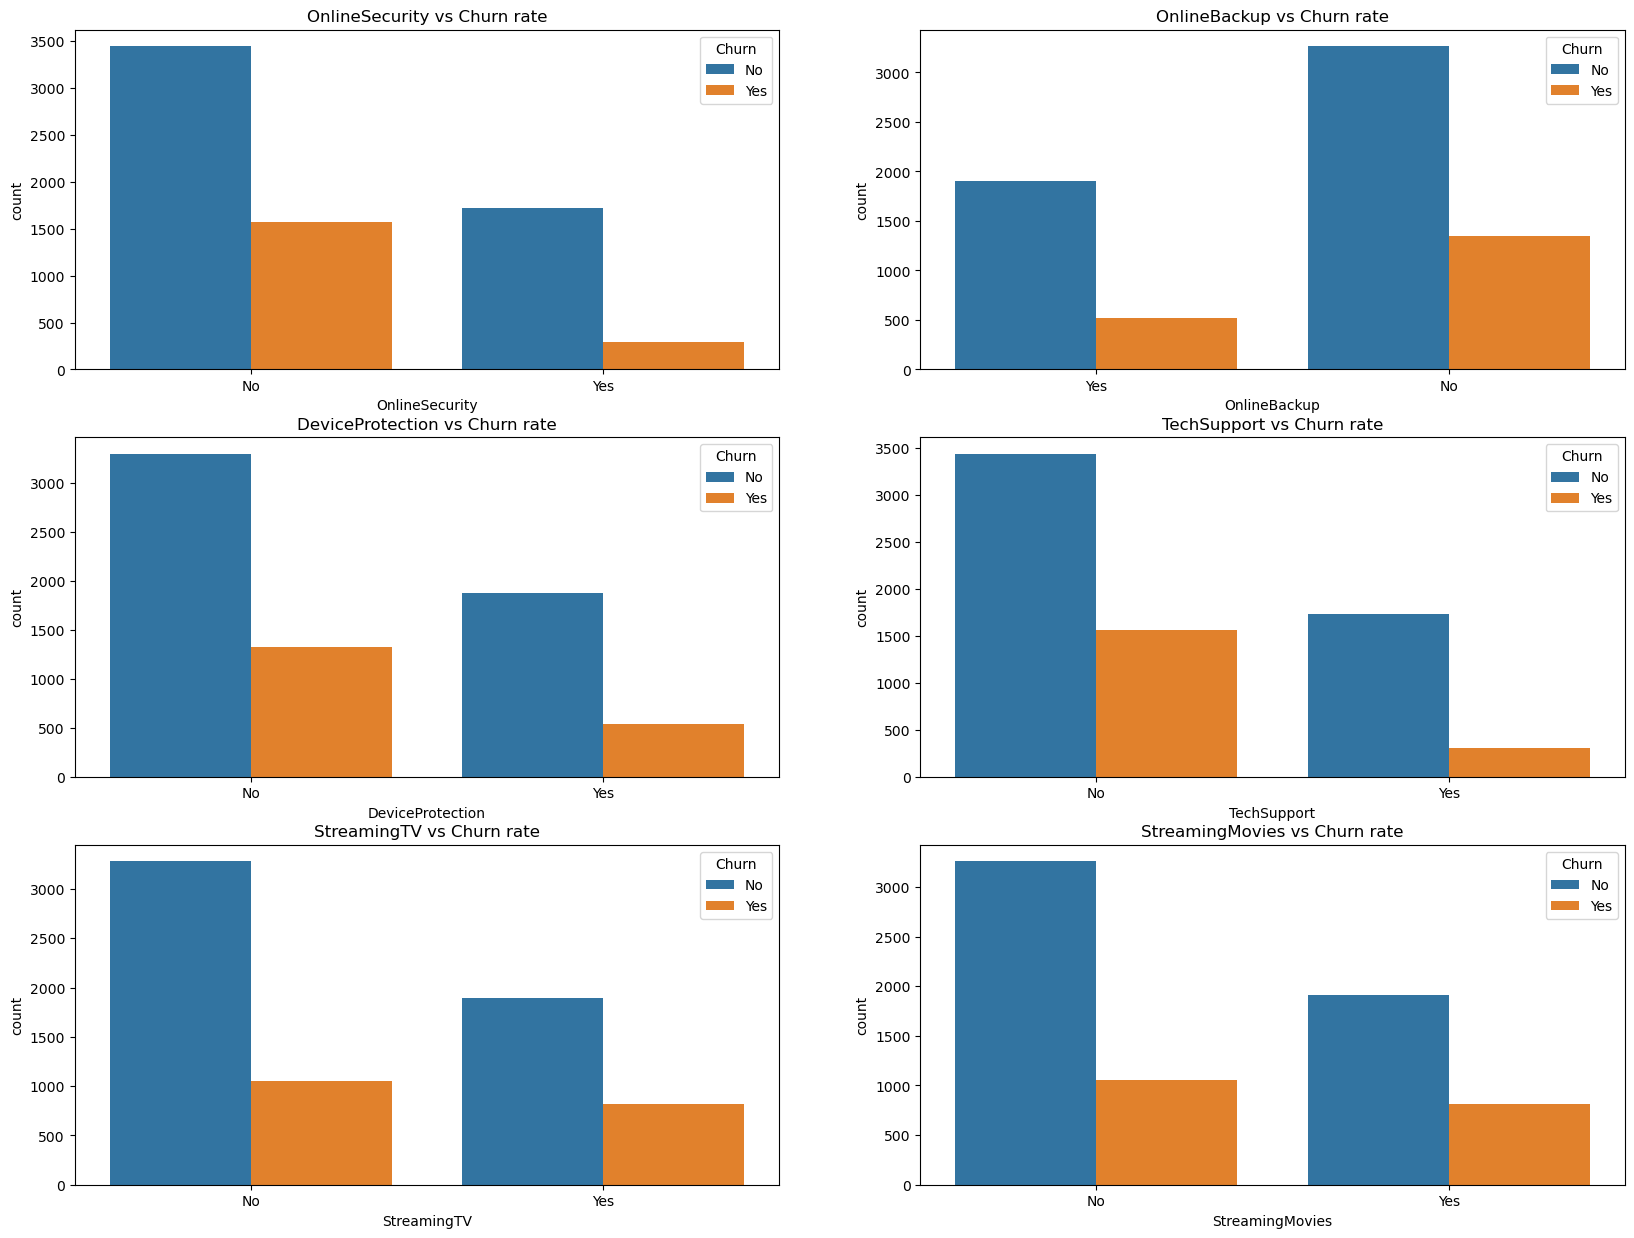

In [33]:
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20,15))

for i, service in enumerate(services,1):
    plt.subplot(3,2,i)
    sns.countplot(data=df,x=service,hue="Churn")
    plt.title(f"{service} vs Churn rate")
plt.show()

    

<h2>Feature Engineering and Model Training</h2>

In [34]:
df.drop('customerID',inplace=True,axis=1)

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,0 - 24 months,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,24 - 36 months,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,0 - 24 months,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,36 - 48 months,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,0 - 24 months,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
numerical_cols=['MonthlyCharges','TotalCharges']
categorical_cols=[col for col in df.columns if df[col].dtype=='object']
categorical_cols.remove('Churn')

In [39]:
numerical_transformer=Pipeline(steps=[("Imputer",SimpleImputer(strategy="median")),("Scaler",StandardScaler())])
categorical_transformer=Pipeline(steps=[("Imputer",SimpleImputer(strategy="most_frequent")),("Encoder",OneHotEncoder())])

In [40]:
preprocessing=ColumnTransformer(transformers=[("numerical_columns",numerical_transformer,numerical_cols),
                                              ("categorical_columns",categorical_transformer,categorical_cols)])

In [41]:
pipe=Pipeline(steps=[('preprocessing',preprocessing),('model',LogisticRegression())])

In [42]:
parameters=[
    {'model':[LogisticRegression()],'model__C':[0.1,0.5,1,2,10]},
    {'model':[RandomForestClassifier()],'model__n_estimators': [100, 200]},
    {'model':[SVC()],'model__C':[0.1,0.5,1,10],'model__kernel':['linear','rbf']},
    {'model':[DecisionTreeClassifier()],'model__max_depth': [3,4,5,6,7,10]}]
     

In [43]:
grid_search=GridSearchCV(pipe,parameters,cv=10,scoring='f1',n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical_columns',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Scaler',
                                                                                          StandardScaler())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical_columns',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('Encoder',
                                                                                          OneHotE...
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression(C=0.1)],
                          'model__C': [0.1, 0.5, 1, 2, 10]},
                         {'model': [RandomForestClassifier()],
                          'model__n_estimators': [100, 200]},
                         {'model': [SVC()], 'model__C': [0.1, 0.5, 1, 10],
                          'model__kernel': ['linear', 'rbf']},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 4, 5, 6, 7, 10]}],
             scoring='f1')

In [44]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_columns',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical_columns',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', LogisticRegression(C=0.1))])

In [45]:
best_pipeline=grid_search.best_estimator_

In [46]:
y_pred=best_pipeline.predict(X_test)

In [47]:
print("\t\tClassification Report:")
print(classification_report(y_test,y_pred))

		Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.91      0.89      1036
         Yes       0.71      0.59      0.64       373

    accuracy                           0.83      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.83      0.82      1409



In [48]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[945  91]
 [153 220]]


In [49]:
print("Best model selected:")
print(grid_search.best_estimator_.named_steps['model'],"\n")

print("Best hyperparameters:")
print(grid_search.best_params_)


Best model selected:
LogisticRegression(C=0.1) 

Best hyperparameters:
{'model': LogisticRegression(C=0.1), 'model__C': 0.1}
